This file should be in /edge-ai-cought-count/notebooks/

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import sys
import IPython.display as ipd
from enum import Enum
sys.path.append(os.path.abspath('../src')) # this is very useful to know
from helpers import *
from dataset_gen import *
import random
import string

In [18]:
data_folder = '../../data/public_dataset/' #Location of public dataset in your file directory

subj_ids = os.listdir(data_folder)
if '.DS_Store' in subj_ids: # Remove .DS_Store file if it exists
    subj_ids.remove('.DS_Store')
print("There are {0} subjects".format(len(subj_ids)))

output_folder = '../../four_classes/raw/' # with train/test separation
os.makedirs(output_folder, exist_ok=True) # Make sure output directory exists


There are 15 subjects


In [33]:
# Create the output directory if it doesn't exist
cough_f = os.path.join(output_folder, "cough")
deep_breathing_f = os.path.join(output_folder, "deep_breathing")
laugh_f = os.path.join(output_folder, "laugh")
throat_clearing_f = os.path.join(output_folder, "throat_clearing")

os.makedirs(cough_f, exist_ok=True)
os.makedirs(deep_breathing_f, exist_ok=True)
os.makedirs(laugh_f, exist_ok=True)
os.makedirs(throat_clearing_f, exist_ok=True)

In [24]:
# save cough samples
num_coughs = []
for id in subj_ids: 
    print(f"Processing subject {id}...")

    # Example: generate dataset with a window length of 1 seconds augmented twice
    audio_data, _, labels, total_coughs = get_samples_for_subject(data_folder, subj_id=id, window_len=1, aug_factor=1)

    num_coughs.append(total_coughs)

    for i, sample in enumerate(audio_data):
            # Extract the outer microphone data (first index)
            outer_mic_data = sample[:, 0]
            bodyfacing_mic_data = sample[:, 1]

            # creating .wav files. each recording is done with bopdyfacing and outwardfacing mic
            filename_1 = f"{id}_{i}_bodyfacing_mic.wav"
            filename_2 = f"{id}_{i}_outwardfacing_mic.wav"
            if labels[i] == 1:
                output_file_1 = os.path.join(cough_f, filename_1)
                output_file_2 = os.path.join(cough_f, filename_2)
                # Save the audio data as a .wav file
                wavfile.write(output_file_1, FS_AUDIO, (outer_mic_data * 32767).astype(np.int16)) # FS_AUDIO=16000 defined in helpers.py
                wavfile.write(output_file_2, FS_AUDIO, (bodyfacing_mic_data * 32767).astype(np.int16)) 

        
print("Done!")

Processing subject 86463...
Processing subject 76918...
Processing subject 87447...
Processing subject 55502...
Processing subject 97706...
Processing subject 14287...
Processing subject 49661...
Processing subject 84479...
Processing subject 14547...
Processing subject 14342...
Processing subject 38936...
Processing subject 20794...
Processing subject 87369...
Processing subject 74768...
Processing subject 47779...
Done!


In [32]:
# save laugh samples
for j, id in enumerate(subj_ids):
    print(f"Processing subject {id}...")

    for trial in Trial:
        for mov in Movement:
            for noise in Noise:
                sound = Sound.LAUGH  # 1 change sound

                path = data_folder + id + '/trial_' + trial + '/mov_' + mov + '/background_noise_' + noise + '/' + sound
                if os.path.isdir(path):
                    #audio_air, audio_skin = load_audio(data_folder, id, trial, mov, noise, sound)
                    audio_data, _ = get_non_cough_windows(data_folder, id, trial, mov, noise, sound, num_coughs[j]*1, window_len=1)
                    #print(audio.shape)
                    #print(num_coughs[i])

                    for i, sample in enumerate(audio_data):
                        # Extract the outer microphone data (first index)
                        outer_mic_data = sample[:, 0]
                        bodyfacing_mic_data = sample[:, 1]

                        filename_1 = f"{id}_{i}_l_bodyfacing_mic.wav" # 2 change letter 
                        filename_2 = f"{id}_{i}_l_outwardfacing_mic.wav"  

                        output_file_1 = os.path.join(laugh_f, filename_1)  # 3 change folder
                        output_file_2 = os.path.join(laugh_f, filename_2)
                        # Save the audio data as a .wav file
                        wavfile.write(output_file_1, FS_AUDIO, (bodyfacing_mic_data * 32767).astype(np.int16)) # FS_AUDIO=16000 defined in helpers.py
                        wavfile.write(output_file_2, FS_AUDIO, (outer_mic_data * 32767).astype(np.int16)) 
print("Done!")

Processing subject 86463...
Processing subject 76918...
Processing subject 87447...
Processing subject 55502...
Processing subject 97706...
Processing subject 14287...
Processing subject 49661...
Processing subject 84479...
Processing subject 14547...
Processing subject 14342...
Processing subject 38936...
Processing subject 20794...
Processing subject 87369...
Processing subject 74768...
Processing subject 47779...
Done!


In [34]:
# save deep_breathing samples
for j, id in enumerate(subj_ids):
    print(f"Processing subject {id}...")

    for trial in Trial:
        for mov in Movement:
            for noise in Noise:
                sound = Sound.BREATH  # 1 change sound

                path = data_folder + id + '/trial_' + trial + '/mov_' + mov + '/background_noise_' + noise + '/' + sound
                if os.path.isdir(path):
                    #audio_air, audio_skin = load_audio(data_folder, id, trial, mov, noise, sound)
                    audio_data, _ = get_non_cough_windows(data_folder, id, trial, mov, noise, sound, num_coughs[j]*1, window_len=1)
                    #print(audio.shape)
                    #print(num_coughs[i])

                    for i, sample in enumerate(audio_data):
                        # Extract the outer microphone data (first index)
                        outer_mic_data = sample[:, 0]
                        bodyfacing_mic_data = sample[:, 1]

                        filename_1 = f"{id}_{i}_b_bodyfacing_mic.wav" # 2 change letter 
                        filename_2 = f"{id}_{i}_b_outwardfacing_mic.wav"  

                        output_file_1 = os.path.join(deep_breathing_f, filename_1)  # 3 change folder
                        output_file_2 = os.path.join(deep_breathing_f, filename_2)
                        # Save the audio data as a .wav file
                        wavfile.write(output_file_1, FS_AUDIO, (bodyfacing_mic_data * 32767).astype(np.int16)) # FS_AUDIO=16000 defined in helpers.py
                        wavfile.write(output_file_2, FS_AUDIO, (outer_mic_data * 32767).astype(np.int16)) 
print("Done!")

Processing subject 86463...
Processing subject 76918...
Processing subject 87447...
Processing subject 55502...
Processing subject 97706...
Processing subject 14287...
Processing subject 49661...
Processing subject 84479...
Processing subject 14547...
Processing subject 14342...
Processing subject 38936...
Processing subject 20794...
Processing subject 87369...
Processing subject 74768...
ERROR: Air mic file not found
ERROR: Skin mic file not found


UnboundLocalError: local variable 'fs_aa' referenced before assignment

In [36]:
# save throat_clearing samples
for j, id in enumerate(subj_ids):
    print(f"Processing subject {id}...")

    for trial in Trial:
        for mov in Movement:
            for noise in Noise:
                sound = Sound.THROAT  # 1 change sound

                path = data_folder + id + '/trial_' + trial + '/mov_' + mov + '/background_noise_' + noise + '/' + sound
                if os.path.isdir(path):
                    #audio_air, audio_skin = load_audio(data_folder, id, trial, mov, noise, sound)
                    audio_data, _ = get_non_cough_windows(data_folder, id, trial, mov, noise, sound, num_coughs[j]*1, window_len=1)
                    #print(audio.shape)
                    #print(num_coughs[i])

                    for i, sample in enumerate(audio_data):
                        # Extract the outer microphone data (first index)
                        outer_mic_data = sample[:, 0]
                        bodyfacing_mic_data = sample[:, 1]

                        filename_1 = f"{id}_{i}_t_bodyfacing_mic.wav" # 2 change letter 
                        filename_2 = f"{id}_{i}_t_outwardfacing_mic.wav"  

                        output_file_1 = os.path.join(throat_clearing_f, filename_1)  # 3 change folder
                        output_file_2 = os.path.join(throat_clearing_f, filename_2)
                        # Save the audio data as a .wav file
                        wavfile.write(output_file_1, FS_AUDIO, (bodyfacing_mic_data * 32767).astype(np.int16)) # FS_AUDIO=16000 defined in helpers.py
                        wavfile.write(output_file_2, FS_AUDIO, (outer_mic_data * 32767).astype(np.int16)) 
print("Done!")

Processing subject 86463...
Processing subject 76918...
Processing subject 87447...
Processing subject 55502...
Processing subject 97706...
Processing subject 14287...
Processing subject 49661...
Processing subject 84479...
Processing subject 14547...
Processing subject 14342...
Processing subject 38936...
Processing subject 20794...
Processing subject 87369...
Processing subject 74768...
Processing subject 47779...
Done!


In [39]:
folders = os.listdir(output_folder+ 'cough')
print(folders)

['74768_723_outwardfacing_mic.wav', '14287_380_outwardfacing_mic.wav', '74768_294_outwardfacing_mic.wav', '20794_177_bodyfacing_mic.wav', '86463_417_bodyfacing_mic.wav', '86463_9_outwardfacing_mic.wav', '87369_718_outwardfacing_mic.wav', '55502_64_outwardfacing_mic.wav', '49661_583_bodyfacing_mic.wav', '14547_487_outwardfacing_mic.wav', '14287_975_outwardfacing_mic.wav', '87447_634_outwardfacing_mic.wav', '14287_341_bodyfacing_mic.wav', '14547_1162_outwardfacing_mic.wav', '49661_34_bodyfacing_mic.wav', '14287_483_bodyfacing_mic.wav', '14547_763_outwardfacing_mic.wav', '86463_107_bodyfacing_mic.wav', '87369_125_outwardfacing_mic.wav', '97706_1060_outwardfacing_mic.wav', '84479_477_outwardfacing_mic.wav', '76918_706_outwardfacing_mic.wav', '38936_68_outwardfacing_mic.wav', '76918_827_bodyfacing_mic.wav', '49661_751_bodyfacing_mic.wav', '74768_630_bodyfacing_mic.wav', '55502_770_outwardfacing_mic.wav', '55502_1186_outwardfacing_mic.wav', '87369_834_outwardfacing_mic.wav', '55502_1431_outw

In [44]:
# define test subjects:
test_subj_ids = subj_ids[:2] # last 2 subjects
print("Test subjects: ", test_subj_ids)

# Create empty output directory 
with open(os.path.join(output_folder, 'testing_list.txt'), 'w') as f:
    pass  # Just opens and clears the file

classes = sorted(os.listdir(output_folder))
if '.DS_Store' in classes: # Remove .DS_Store file if it exists
    classes.remove('.DS_Store')
if 'testing_list.txt' in classes: # Remove testing_list.txt
    classes.remove('testing_list.txt')

for c in classes:
    files = sorted(os.listdir(os.path.join(output_folder + c)))
    with open(os.path.join(output_folder, 'testing_list.txt'), 'a') as f: 
        for filename in files:
            if filename.startswith((test_subj_ids[0], test_subj_ids[1])):
                f.write(c + '/' + filename + '\n')

Test subjects:  ['86463', '76918']


In [49]:
# generate validation_list.txt
random.seed(3)
# split proportion
val_prop = 0.05

with open(os.path.join(output_folder, 'validation_list.txt'), 'w') as f:
    pass  # Just opens and clears the file

for c in classes:
    files = sorted(os.listdir(os.path.join(output_folder + c)))
    # remove test samples
    for filename in files:
        if filename.startswith((test_subj_ids[0], test_subj_ids[1])):
            files.remove(filename)
    # Shuffle
    random.shuffle(files)
    # extract validation files
    num_files = len(files)
    num_val = int(0.05 * num_files)
    val_files = files[:num_val]

    # Append validation list
    with open(os.path.join(output_folder, 'validation_list.txt'), 'a') as f: 
        for item in val_files:
            f.write(c + '/' + item + '\n')


    print('{0} files from class {1}'.format(len(val_files), c))

with open(os.path.join(output_folder, 'validation_list.txt'), 'r') as f:
    lines = f.readlines()
    print('Total file lines', len(lines))

399 files from class cough
367 files from class deep_breathing
399 files from class laugh
399 files from class throat_clearing
Total file lines 1564


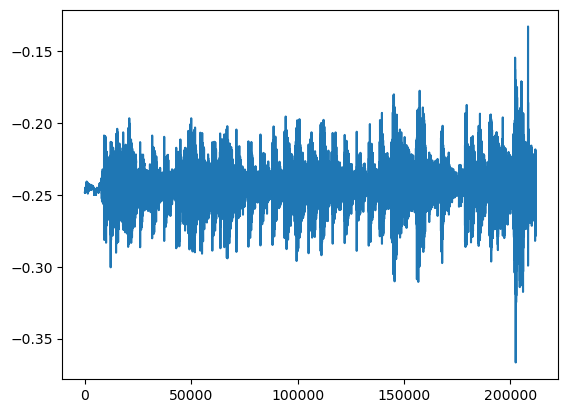

In [13]:
# Test
audio_air, audio_skin = load_audio(data_folder, subj_ids[0], '1', 'sit', 'music', 'deep_breathing')

plt.plot(audio_air)
ipd.Audio(audio_air, rate=FS_AUDIO, autoplay=True)